<a href="https://colab.research.google.com/github/aksnd/kaggle_dacon_projects/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%20%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8/stock%20project/stock%20price%20prediction%20ownloss%200414.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q yfinance

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

from datetime import datetime
# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year -2, end.month, end.day)

for stock in tech_list:
  globals()[stock] = yf.download(stock, start, end) #일종의 변수 만드는 방식

#결과적으로 AAPL, GOOG, MSFT,AMZN이라는 변수에 다운받은 값이 들어가게됨

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE","MICROSOFT","AMAZON"]

for company, com_name in zip(company_list, company_name):
  company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.head(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-04-14,170.619995,171.270004,165.039993,165.289993,163.422470,75329400,APPLE
2022-04-18,163.919998,166.600006,163.570007,165.070007,163.204956,69023900,APPLE
2022-04-19,165.020004,167.820007,163.910004,167.399994,165.508606,67723800,APPLE
2022-04-20,168.759995,168.880005,166.100006,167.229996,165.340530,67929800,APPLE
2022-04-21,168.910004,171.529999,165.910004,166.419998,164.539688,87227800,APPLE
2022-04-22,166.460007,167.869995,161.500000,161.789993,159.961990,84882400,APPLE
2022-04-25,161.119995,163.169998,158.460007,162.880005,161.039703,96046400,APPLE
2022-04-26,162.250000,162.339996,156.720001,156.800003,155.028412,95623200,APPLE
2022-04-27,155.910004,159.789993,155.380005,156.570007,154.800995,88063200,APPLE


In [ ]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,501.000000,501.000000,501.000000,501.000000,501.000000,5.010000e+02
mean,165.156128,166.918164,163.556427,165.319541,164.508544,6.906570e+07
std,18.712336,18.392981,18.942725,18.675741,18.981813,2.418219e+07
min,126.010002,127.769997,124.169998,125.019997,124.166641,2.404830e+07
25%,148.869995,150.919998,147.240005,149.350006,148.119385,5.182690e+07
50%,168.490005,169.199997,166.250000,167.529999,166.458023,6.452200e+07
75%,180.669998,182.229996,178.550003,180.710007,180.238220,8.022360e+07
max,198.020004,199.619995,197.000000,198.110001,197.857529,1.826020e+08


In [ ]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 501 entries, 2022-04-14 to 2024-04-12
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          501 non-null    float64
 1   High          501 non-null    float64
 2   Low           501 non-null    float64
 3   Close         501 non-null    float64
 4   Adj Close     501 non-null    float64
 5   Volume        501 non-null    int64  
 6   company_name  501 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 31.3+ KB


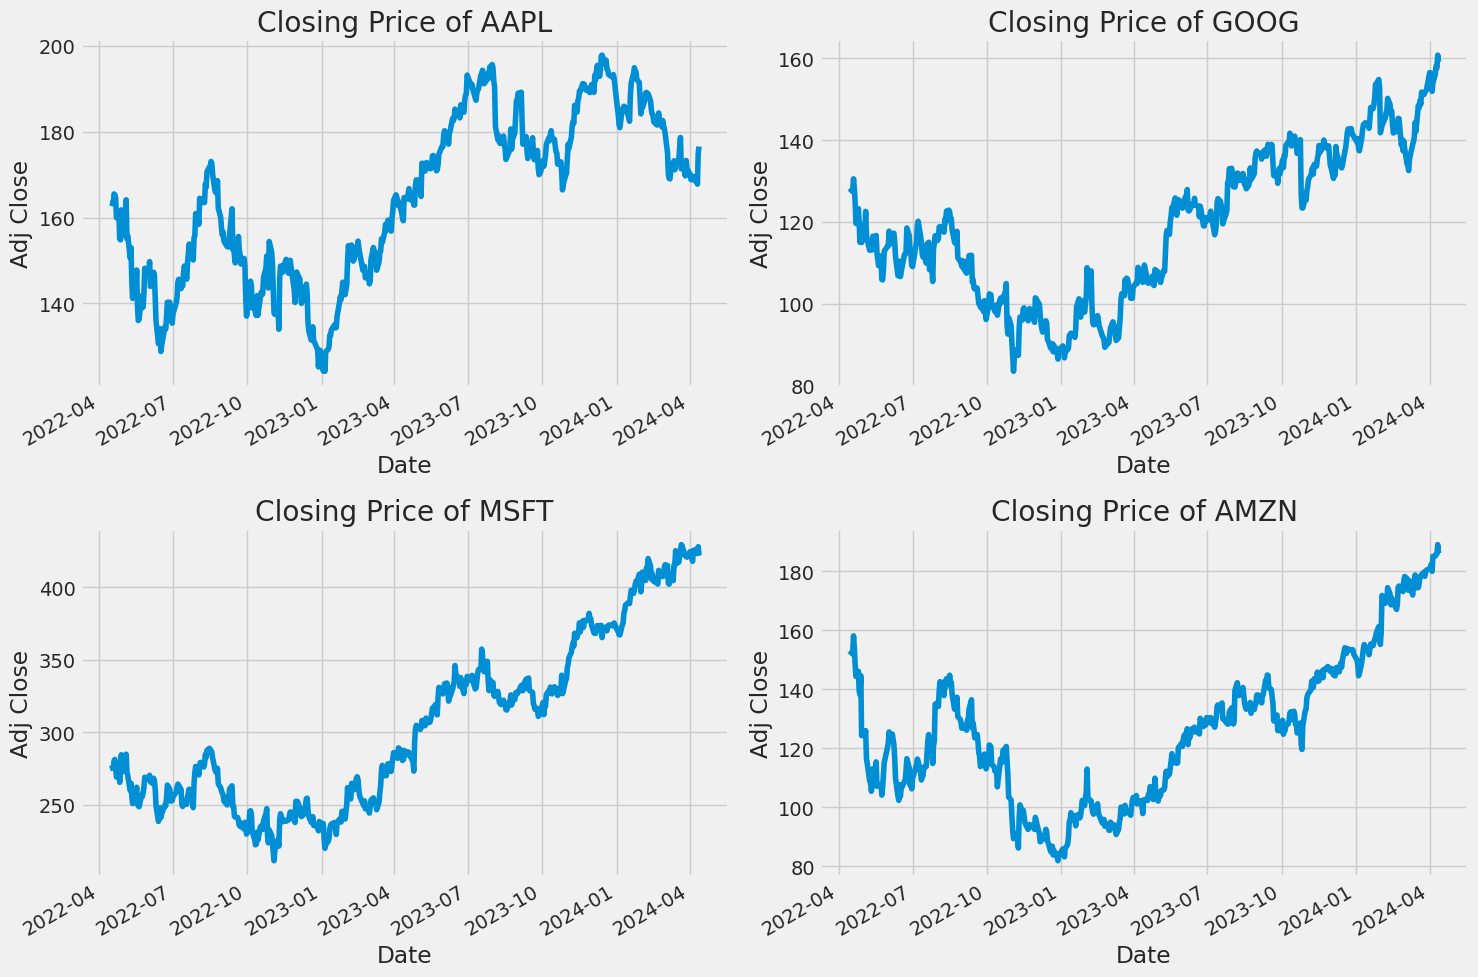

In [ ]:
plt.figure(figsize= (15,10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
  plt.subplot(2, 2 ,i)
  company['Adj Close'].plot()
  plt.ylabel('Adj Close')
  plt.title(f"Closing Price of {tech_list[i-1]}")

plt.tight_layout()

preidcting the price stock price of APPLE inc

In [ ]:
# Define the ticker symbol(s) of the asset(s) you want to retrieve data for

# Specify the start and end dates for the data retrieval
end = datetime.now()

# Retrieve the historical market data from Yahoo Finance
df = pdr.get_data_yahoo('AAPL',start='2014-01-01', end=datetime.now())

print(df.head())

[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2014-01-02  19.845715  19.893929  19.715000  19.754642  17.296652  234684800
2014-01-03  19.745001  19.775000  19.301071  19.320715  16.916723  392467600
2014-01-06  19.194643  19.528570  19.057142  19.426071  17.008966  412610800
2014-01-07  19.440001  19.498571  19.211430  19.287144  16.887321  317209200
2014-01-08  19.243214  19.484285  19.238930  19.409286  16.994268  258529600


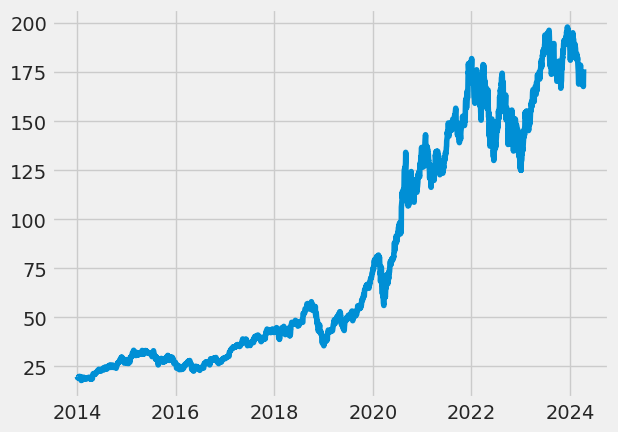

In [ ]:
plt.plot(df['Close'])
plt.show()

In [ ]:
data = df.filter(['Close'])
dataset = data.values

training_data_len = int(np.ceil(len(dataset)*0.95))

In [ ]:
# Create the training data set
# Create the scaled training data set
train_data = dataset[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(70, len(train_data)): #앞 60개를 통해 다음걸 예측하라
    x_train.append(train_data[i-70:i-10, 0])
    y_train.append(train_data[i, 0])

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
print(x_train.shape)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (-1, 1))
# x_train.shape
print(x_train.shape)
print(y_train.shape)

(2388, 60)
(2388, 60, 1)
(2388, 1)


In [ ]:
import torch
import torch.nn as nn
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
x_train = torch.from_numpy(x_train).type(torch.Tensor).to(device)
y_train = torch.from_numpy(y_train).type(torch.Tensor).to(device)

In [ ]:
x_train[:,-1,:].shape

torch.Size([2388, 1])

In [ ]:
input_size = 1
hidden_size = 256
num_layers = 6
output_size =1

class LSTMModel(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, output_size):
      super(LSTMModel, self).__init__()
      self.hidden_size = hidden_size
      self.num_layers = num_layers

      # Define the LSTM layer
      self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
      #batch_first 가 true일때 입력값은 batch, seq, feature로
      #feature는 1(특성 1개임), seq는 60(특성한개의 크기), batch는 batch_size 지금은 1임

      # Define the fully connected layer
      self.fc1 = nn.Linear(hidden_size, 128)
      self.fc2 = nn.Linear(128,32)
      self.fc3 = nn.Linear(32,8)
      self.fc4 = nn.Linear(8,output_size)
  def forward(self, x):
      # Initialize hidden state with zeros
      h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)

      # Initialize cell state with zeros
      c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)

      # Forward propagate LSTM
      out, _ = self.lstm(x, (h0, c0))  # out shape: (batch_size, seq_length, hidden_size)

      # Decode the hidden state of the last time step
      out = self.fc1(out[:, -1, :]) #out[:,-1,:]은 중간거는 마지막것만 취급한다는 뜻이고
      out = self.fc2(out)
      out = self.fc3(out)
      out = self.fc4(out)
      #중간차원이 날아가 torch([hidden_size,1])을 self.fc에 넣게됨
      return out


In [ ]:
model = LSTMModel(input_size=input_size, hidden_size=hidden_size,
                  num_layers=num_layers, output_size=output_size).to(device)

loss_fn = torch.nn.MSELoss().to(device)
optimizer = torch.optim.Adam(model.parameters(),lr=0.0005)
print(model)


LSTMModel(
  (lstm): LSTM(1, 256, num_layers=6, batch_first=True)
  (fc1): Linear(in_features=256, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=8, bias=True)
  (fc4): Linear(in_features=8, out_features=1, bias=True)
)


In [ ]:
num_epochs = 300
hist = np.zeros(num_epochs)


for t in range(num_epochs):
  y_train_pred = model(x_train)
  loss = loss_fn(y_train_pred,(y_train - x_train[:,-1,:])).to(device)
  if(t%10==0):
    print("Epoch ", t, "custom loss:", loss.item())
  hist[t]=loss.item()

  optimizer.zero_grad()
  loss.backward()
  # Update parameters
  optimizer.step()

Epoch  0 custom loss: 29.938730239868164
Epoch  10 custom loss: 29.54135513305664
Epoch  20 custom loss: 29.523849487304688
Epoch  30 custom loss: 29.40471839904785
Epoch  40 custom loss: 29.264604568481445
Epoch  50 custom loss: 28.429363250732422
Epoch  60 custom loss: 28.39453125
Epoch  70 custom loss: 28.063671112060547
Epoch  80 custom loss: 27.544557571411133
Epoch  90 custom loss: 27.454296112060547
Epoch  100 custom loss: 27.223526000976562
Epoch  110 custom loss: 26.812955856323242
Epoch  120 custom loss: 27.54945182800293
Epoch  130 custom loss: 27.42209243774414
Epoch  140 custom loss: 26.96592140197754
Epoch  150 custom loss: 25.975332260131836
Epoch  160 custom loss: 27.779022216796875
Epoch  170 custom loss: 26.946470260620117
Epoch  180 custom loss: 28.12896728515625
Epoch  190 custom loss: 26.840576171875
Epoch  200 custom loss: 26.82527732849121
Epoch  210 custom loss: 26.468128204345703
Epoch  220 custom loss: 25.497982025146484
Epoch  230 custom loss: 26.598453521728

In [ ]:
test_data = dataset[int(training_data_len)-70: , :]

x_test = []
y_test = []

for i in range(70, len(test_data)): #앞 60개를 통해 다음걸 예측하라
    x_test.append(test_data[i-70:i-10, 0])
    y_test.append(test_data[i, 0])

# Convert the x_train and y_train to numpy arrays
x_test, y_test = np.array(x_test), np.array(y_test)

# Reshape the data
print(x_test.shape)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = np.reshape(y_test, (-1, 1))
# x_train.shape
print(x_test.shape)

x_test = torch.from_numpy(x_test).type(torch.Tensor).to(device)
y_test = torch.from_numpy(y_test).type(torch.Tensor).to(device)
print(x_test.shape)

(129, 60)
(129, 60, 1)
torch.Size([129, 60, 1])


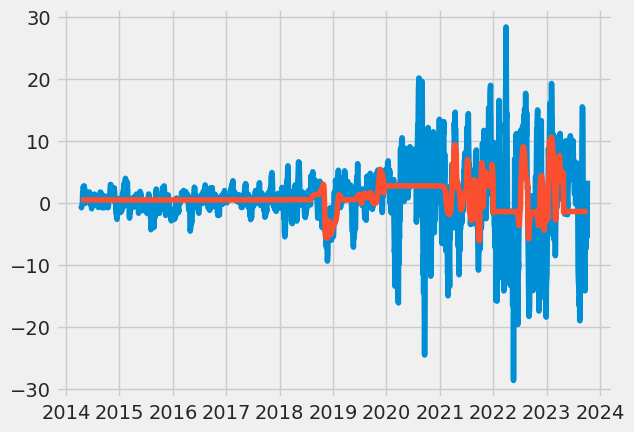

In [ ]:
plt.plot(data[70:training_data_len].index.to_numpy(),(y_train - x_train[:,-1,:]).cpu())
plt.plot(data[70:training_data_len].index.to_numpy(),y_train_pred.cpu().detach().numpy())

In [ ]:
import math
from sklearn.metrics import mean_squared_error
# make predictions
y_train_pred = model(x_train)
y_test_pred = model(x_test)

buy_price_train = (x_train.cpu()[:,-1,:].detach().numpy())
y_train_pred = (y_train_pred.cpu().detach().numpy())
y_train = (y_train.cpu().detach().numpy())
buy_price_test = (x_test.cpu()[:,-1,:].detach().numpy())
y_test_pred = (y_test_pred.cpu().detach().numpy())
y_test = (y_test.cpu().detach().numpy())



y_train_earn = (y_train - buy_price_train)
y_test_earn = (y_test - buy_price_test)

# calculate root mean squared error


trainScore = math.sqrt(mean_squared_error(y_train_earn, y_train_pred))
print('Train Score: %.4f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test_earn, y_test_pred))
print('Test Score: %.4f RMSE' % (testScore))

Train Score: 5.0284 RMSE
Test Score: 7.9577 RMSE


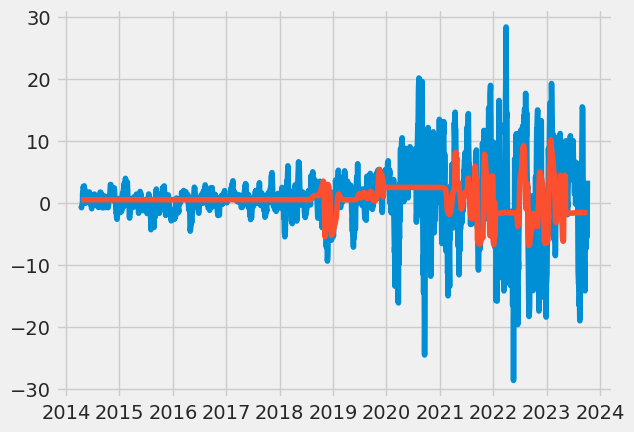

In [ ]:
plt.plot(data[70:training_data_len].index.to_numpy(),y_train_earn)
plt.plot(data[70:training_data_len].index.to_numpy(),y_train_pred)

<ipython-input-334-8cfa6b116936>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Predictions'] = y_train_pred
<ipython-input-334-8cfa6b116936>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = y_test_pred


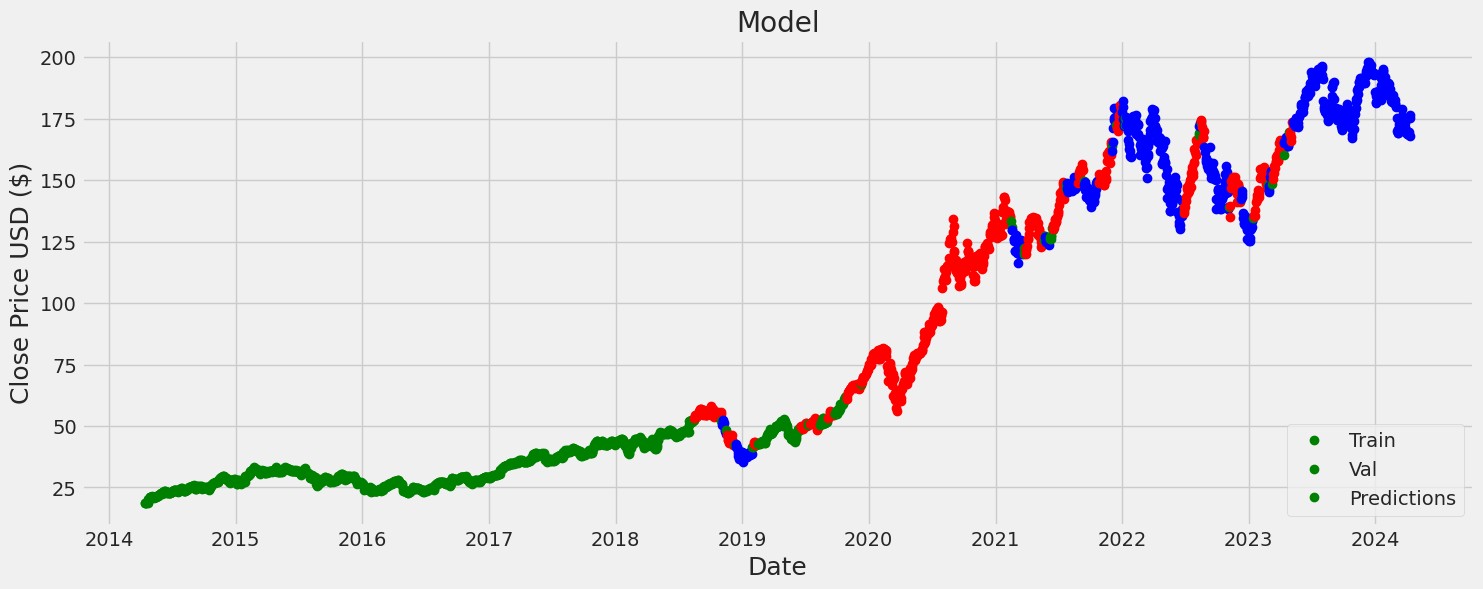

In [ ]:
# Plot the data
train = data[70:training_data_len]
valid = data[training_data_len:]

train['Predictions'] = y_train_pred
valid['Predictions'] = y_test_pred
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

for i in range(len(train['Close'])):
  if train['Predictions'][i] > 1.0:
        plt.plot(train.index.to_numpy()[i], train['Close'][i], 'ro')  # Plot red if B > 0.5
  elif train['Predictions'][i] > -0.3:
        plt.plot(train.index.to_numpy()[i], train['Close'][i], 'go')  # Plot red if B > 0.5
  else:
        plt.plot(train.index.to_numpy()[i], train['Close'][i], 'bo')  # Plot blue if B <= 0.5

for i in range(len(valid['Close'])):
  if valid['Predictions'][i] > 1.0:
        plt.plot(valid.index.to_numpy()[i], valid['Close'][i], 'ro')  # Plot red if B > 0.5
  elif valid['Predictions'][i] > -0.3:
        plt.plot(valid.index.to_numpy()[i], valid['Close'][i], 'go')  # Plot red if B > 0.5
  else:
        plt.plot(valid.index.to_numpy()[i], valid['Close'][i], 'bo')  # Plot blue if B <= 0.5
#plt.plot(train['Close'])
#plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

#함수 꼬라지 보니까 %계수로 계산할수 있게 loss함수 바꿔야할듯

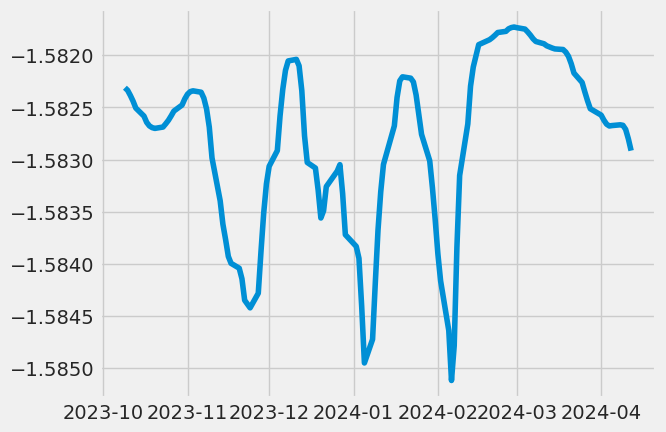

In [ ]:
plt.plot(data[training_data_len:].index.to_numpy(),y_test_pred)